# 1 Imports

In [1]:
import mysql.connector as connection
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore", UserWarning)

# 2 Data Input Pipeline

In [2]:
queries = []
dataframes = []

try:
    db = connection.connect(
        host="localhost",
        database="f1_database",
        user="root",
        passwd="Thao12345678@",
        use_pure=True
    )
    queries.append("SELECT * from circuits;")
    queries.append("SELECT * from constructorresults;")
    queries.append("SELECT * from constructors;")
    queries.append("SELECT * from constructorstandings;")
    queries.append("SELECT * from drivers;")
    queries.append("SELECT * from driverstandings;")
    queries.append("SELECT * from laptimes;")
    queries.append("SELECT * from pitstops;")
    queries.append("SELECT * from qualifying;")
    queries.append("SELECT * from races;")
    queries.append("SELECT * from results;")
    queries.append("SELECT * from seasons;")
    queries.append("SELECT * from sprintresults;")
    queries.append("SELECT * from status;")

    circuits_df = pd.read_sql(queries[0], db)
    constructorresults_df = pd.read_sql(queries[1], db)
    constructors_df = pd.read_sql(queries[2], db)
    constructorstandings_df = pd.read_sql(queries[3], db)
    drivers_df = pd.read_sql(queries[4], db)
    driverstandings_df = pd.read_sql(queries[5], db)
    laptimes_df = pd.read_sql(queries[6], db)
    pitstops_df = pd.read_sql(queries[7], db)
    qualifying_df = pd.read_sql(queries[8], db)
    races_df = pd.read_sql(queries[9], db)
    results_df = pd.read_sql(queries[10], db)
    seasons_df = pd.read_sql(queries[11], db)
    sprintresults_df = pd.read_sql(queries[12], db)
    status_df = pd.read_sql(queries[13], db)

    db.close()

except Exception as e:
    db.close()
    print(str(e))

# 3 Write dataframes to CSV's for convenience

In [3]:
circuits_df.to_csv(
    r'C:\Users\Gabriel\Documents\Code\KEN3450 Data Analysis\Data Madness\Code\CSVs\circuits.csv',
    index=False
)

# 4 Find and fix NaN values

In [4]:
dataframes = [
    circuits_df,
    constructorresults_df,
    constructors_df,
    constructorstandings_df,
    drivers_df,
    driverstandings_df,
    laptimes_df,
    pitstops_df,
    qualifying_df,
    races_df,
    results_df,
    seasons_df,
    sprintresults_df,
    status_df
]

dataframes_names = [
    'circuits_df',
    'constructorresults_df',
    'constructors_df',
    'constructorstandings_df',
    'drivers_df',
    'driverstandings_df',
    'laptimes_df',
    'pitstops_df',
    'qualifying_df',
    'races_df',
    'results_df',
    'seasons_df',
    'sprintresults_df',
    'status_df'
]

In [5]:
def find_nan(data):
    nan_values = data.isna()
    nan_columns = nan_values.any()
    columns_with_nan = data.columns[nan_columns].tolist()
    print(columns_with_nan)

In [6]:
for idx, dataframe in enumerate(dataframes):
    print(dataframes_names[idx])
    find_nan(dataframe)

circuits_df
['alt']
constructorresults_df
['status']
constructors_df
[]
constructorstandings_df
[]
drivers_df
['number', 'code']
driverstandings_df
[]
laptimes_df
[]
pitstops_df
[]
qualifying_df
['q1', 'q2', 'q3']
races_df
['time']
results_df
['number', 'position', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed']
seasons_df
[]
sprintresults_df
[]
status_df
[]


Circuits, Constructorresults, Drivers, Qualifying, Results and Sprintresults contain NaN values.

## 4.1 Circuits

The Altitudes for Al Dayeen and Miami are missing

In [7]:
circuits_df.loc[circuits_df['alt'].isna()]

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
77,78,losail,Losail International Circuit,Al Daayen,Qatar,25.4900,51.4542,NaN,http://en.wikipedia.org/wiki/Losail_Internatio...
78,79,miami,Miami International Autodrome,Miami,United States,25.9581,-80.2389,NaN,https://en.wikipedia.org/wiki/Miami_Internatio...


We could not find the altitude of the Losail International Circuit, but the neighboring city of Doha is at 3m which we're using here. Same goes for the Miami International Autodrome. Here Miami's altitude of 2m was chosen.

In [8]:
circuits_df['alt'] = circuits_df['alt'].replace([np.nan, np.nan], [2,3])

In [9]:
circuits_df.iloc[[77]]

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
77,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49,51.4542,3.0,http://en.wikipedia.org/wiki/Losail_Internatio...


## 4.2 Constructor Results

In [10]:
len(constructorresults_df)

11950

In [11]:
constructorresults_df.loc[constructorresults_df['status'].isna()]

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,None
1,2,18,2,8.0,None
2,3,18,3,9.0,None
3,4,18,4,5.0,None
4,5,18,5,2.0,None
...,...,...,...,...,...
11945,16445,1073,214,6.0,None
11946,16446,1073,117,0.0,None
11947,16447,1073,210,0.0,None
11948,16448,1073,3,0.0,None


Since 11933 out of the 11950 entries in the status column are 'None', it is safe to drop it!

In [12]:
constructorresults_df = constructorresults_df.drop(columns='status')

## 4.3 Drivers

In [13]:
len(drivers_df)

854

In [14]:
drivers_df.loc[drivers_df['number'].isna()]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,NaN,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,NaN,BOU,Sébastien,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
9,10,glock,NaN,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock
...,...,...,...,...,...,...,...,...,...
813,814,resta,NaN,DIR,Paul,di Resta,1986-04-16,British,http://en.wikipedia.org/wiki/Paul_di_Resta
815,816,ambrosio,NaN,DAM,Jérôme,d'Ambrosio,1985-12-27,Belgian,http://en.wikipedia.org/wiki/J%C3%A9r%C3%B4me_...
818,819,pic,NaN,PIC,Charles,Pic,1990-02-15,French,http://en.wikipedia.org/wiki/Charles_Pic
822,823,garde,NaN,VDG,Giedo,van der Garde,1985-04-25,Dutch,http://en.wikipedia.org/wiki/Giedo_van_der_Garde


Once again, 804 out of 854 are NaN, so we drop 'number'.

In [15]:
drivers_df = drivers_df.drop(columns='number')

In [16]:
drivers_df.loc[drivers_df['code'].isna()]

,driverId,driverRef,code,forename,surname,dob,nationality,url
42,43,matta,None,Cristiano,da Matta,1973-09-19,Brazilian,http://en.wikipedia.org/wiki/Cristiano_da_Matta
43,44,panis,None,Olivier,Panis,1966-09-02,French,http://en.wikipedia.org/wiki/Olivier_Panis
44,45,pantano,None,Giorgio,Pantano,1979-02-04,Italian,http://en.wikipedia.org/wiki/Giorgio_Pantano
45,46,bruni,None,Gianmaria,Bruni,1981-05-30,Italian,http://en.wikipedia.org/wiki/Gianmaria_Bruni
46,47,baumgartner,None,Zsolt,Baumgartner,1981-01-01,Hungarian,http://en.wikipedia.org/wiki/Zsolt_Baumgartner
...,...,...,...,...,...,...,...,...
802,802,serafini,None,Dorino,Serafini,1909-07-22,Italian,http://en.wikipedia.org/wiki/Dorino_Serafini
803,803,cantrell,None,Bill,Cantrell,1908-01-31,American,http://en.wikipedia.org/wiki/William_Cantrell
804,804,mantz,None,Johnny,Mantz,1918-09-18,American,http://en.wikipedia.org/wiki/Johnny_Mantz
805,805,kladis,None,Danny,Kladis,1917-02-10,American,http://en.wikipedia.org/wiki/Danny_Kladis


Same reasoning as above, 'code' can be removed!

In [17]:
drivers_df = drivers_df.drop(columns='code')

## 4.4 Qualifying - Work in Progress

In [18]:
len(qualifying_df)

9135

In [19]:
qualifying_df.loc[qualifying_df['q3'].isna()]

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
9,10,18,20,5,15,10,1:26.702,1:25.842,None
10,11,18,22,11,17,11,1:26.369,1:26.173,None
11,12,18,4,4,5,12,1:26.907,1:26.188,None
12,13,18,18,11,16,13,1:26.712,1:26.259,None
13,14,18,6,3,8,14,1:26.891,1:26.413,None
...,...,...,...,...,...,...,...,...,...
9130,9171,1073,849,3,6,16,1:24.338,None,None
9131,9172,1073,847,3,63,17,1:24.423,None,None
9132,9173,1073,8,51,7,18,1:24.779,None,None
9133,9174,1073,854,210,47,19,1:24.906,None,None


In [20]:
qualifying_df.loc[qualifying_df['q3'].isna()]

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
9,10,18,20,5,15,10,1:26.702,1:25.842,None
10,11,18,22,11,17,11,1:26.369,1:26.173,None
11,12,18,4,4,5,12,1:26.907,1:26.188,None
12,13,18,18,11,16,13,1:26.712,1:26.259,None
13,14,18,6,3,8,14,1:26.891,1:26.413,None
...,...,...,...,...,...,...,...,...,...
9130,9171,1073,849,3,6,16,1:24.338,None,None
9131,9172,1073,847,3,63,17,1:24.423,None,None
9132,9173,1073,8,51,7,18,1:24.779,None,None
9133,9174,1073,854,210,47,19,1:24.906,None,None


How to deal with the Qualifyings?

## 4.5 Races

In [21]:
len(races_df)

1080

In [22]:
races_df.loc[races_df['time'].isna()]

,raceId,year,round,circuitId,name,date,time,url
89,90,2004,1,1,Australian Grand Prix,2004-03-07,NaT,http://en.wikipedia.org/wiki/2004_Australian_G...
90,91,2004,2,2,Malaysian Grand Prix,2004-03-21,NaT,http://en.wikipedia.org/wiki/2004_Malaysian_Gr...
91,92,2004,3,3,Bahrain Grand Prix,2004-04-04,NaT,http://en.wikipedia.org/wiki/2004_Bahrain_Gran...
92,93,2004,4,21,San Marino Grand Prix,2004-04-25,NaT,http://en.wikipedia.org/wiki/2004_San_Marino_G...
93,94,2004,5,4,Spanish Grand Prix,2004-05-09,NaT,http://en.wikipedia.org/wiki/2004_Spanish_Gran...
...,...,...,...,...,...,...,...,...
834,835,1950,3,19,Indianapolis 500,1950-05-30,NaT,http://en.wikipedia.org/wiki/1950_Indianapolis...
835,836,1950,4,66,Swiss Grand Prix,1950-06-04,NaT,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
836,837,1950,5,13,Belgian Grand Prix,1950-06-18,NaT,http://en.wikipedia.org/wiki/1950_Belgian_Gran...
837,838,1950,6,55,French Grand Prix,1950-07-02,NaT,http://en.wikipedia.org/wiki/1950_French_Grand...


Reformat into hours

In [23]:
races_df['time'] = races_df['time'].dt.seconds / 3600

Let's examine the missing values in the time column.

In [24]:
races_df['time'].describe()

count    349.000000
mean      12.336676
std        3.427907
min        3.000000
25%       12.000000
50%       12.000000
75%       14.000000
max       20.000000
Name: time, dtype: float64

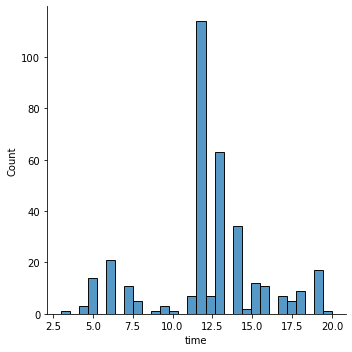

In [25]:
sns.displot(data=races_df['time'])

It seems sensible to replace the NaN values with the mean of the columns since we're going to be using the time to get weather data anyways.

In [26]:
def fix_na(data):
    data['time'] = data['time'].fillna(data['time'].mean())
    data['time'] = data['time']
    return data

In [27]:
races_df = fix_na(races_df)

Realizing that the upcoming races in 2022 are already listed here, we remove those entries.

In [28]:
races_df = races_df.loc[races_df['year'] < 2022]

In [29]:
races_df

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,6.0,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,9.0,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,7.0,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12.0,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12.0,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...,...
1053,1069,2021,17,69,United States Grand Prix,2021-10-24,19.0,http://en.wikipedia.org/wiki/2021_United_State...
1054,1070,2021,18,32,Mexico City Grand Prix,2021-11-07,19.0,http://en.wikipedia.org/wiki/2021_Mexican_Gran...
1055,1071,2021,19,18,São Paulo Grand Prix,2021-11-14,17.0,http://en.wikipedia.org/wiki/São_Paulo_Grand_Prix
1056,1072,2021,21,77,Saudi Arabian Grand Prix,2021-12-05,17.5,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...


## 4.6 Results

In [30]:
len(results_df)

25400

In [31]:
results_df['position'].describe()

count    14613.000000
mean         7.912954
std          4.796383
min          1.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         33.000000
Name: position, dtype: float64

In [32]:
results_df.loc[results_df['fastestLap'].isna()]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
16,17,18,17,9,10.0,14,NaN,R,17,0.0,0,None,NaN,NaN,NaN,None,None,4
17,18,18,18,11,16.0,12,NaN,R,18,0.0,0,None,NaN,NaN,NaN,None,None,4
18,19,18,19,8,19.0,21,NaN,R,19,0.0,0,None,NaN,NaN,NaN,None,None,4
19,20,18,20,5,15.0,9,NaN,R,20,0.0,0,None,NaN,NaN,NaN,None,None,4
20,21,18,21,10,21.0,16,NaN,R,21,0.0,0,None,NaN,NaN,NaN,None,None,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25199,25205,1063,840,117,18.0,19,20.0,20,20,0.0,1,+44.108,251179.0,NaN,0.0,None,None,1
25239,25245,1065,852,213,22.0,0,NaN,W,20,0.0,0,None,NaN,NaN,0.0,None,None,23
25318,25324,1070,854,210,47.0,14,NaN,R,19,0.0,0,None,NaN,NaN,0.0,None,None,4
25319,25325,1070,852,213,22.0,17,NaN,R,20,0.0,0,None,NaN,NaN,0.0,None,None,4


Since only numererical values make sense to evaluate rankings, all NaN values were dropped. We did not want to average rankings or anything like that as we would risk to significantely falsify the results.

In [33]:
results_df = results_df.dropna(axis=0)

In [34]:
results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25386,25392,1073,846,1,4.0,3,7.0,7,7,6.0,58,+59.200,5476545.0,58.0,4.0,1:26.762,219.123,1
25387,25393,1073,4,214,14.0,11,8.0,8,8,4.0,58,+1:01.708,5479053.0,58.0,8.0,1:27.607,217.010,1
25388,25394,1073,839,214,31.0,9,9.0,9,9,2.0,58,+1:04.026,5481371.0,58.0,10.0,1:28.249,215.431,1
25389,25395,1073,844,6,16.0,7,10.0,10,10,1.0,58,+1:06.057,5483402.0,40.0,12.0,1:28.433,214.983,1


## 4.7 Sprintresults - Work in Progress, might drop because very new

In [35]:
len(sprintresults_df)

58

In [36]:
sprintresults_df.loc[sprintresults_df['fastestLapTime'].isna()]

,sprintResultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId


# 5 Create Location and Date dataframes to include weather data

In [37]:
location = circuits_df[['location', 'lat', 'lng', 'alt']]
dates = races_df[['date', 'time']]

# 6 Visualization

### 6.1 Most populat circuits, year,country

In [38]:
race_info = pd.merge(left=races_df, right=circuits_df, left_on='circuitId', right_on='circuitId')


Text(0.5, 1.0, 'Number race per circuits')

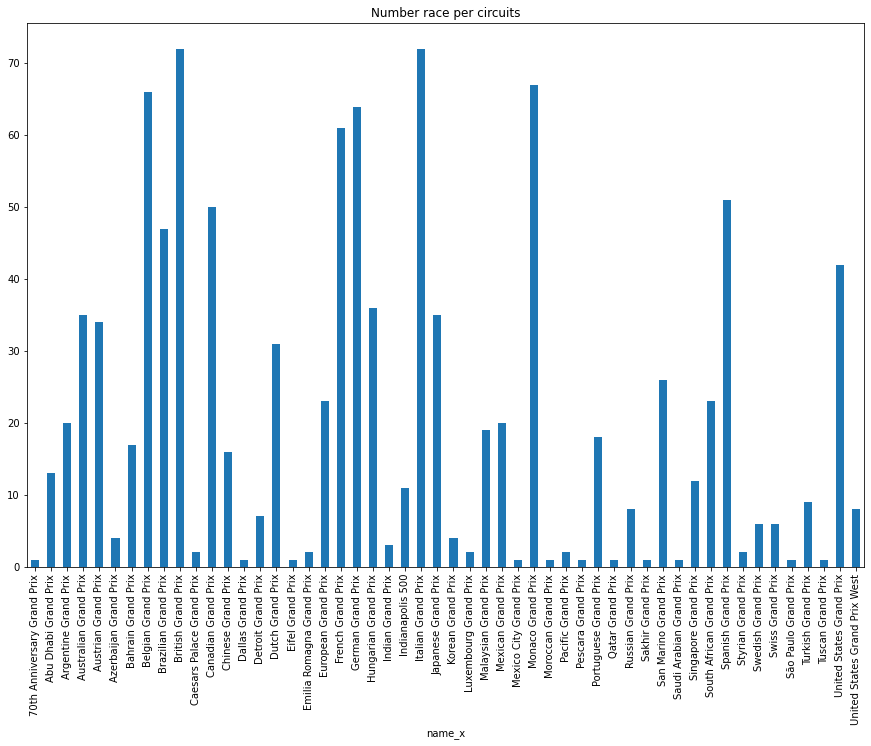

In [39]:
fig, ax = plt.subplots(figsize=(15,10))

race_info.groupby('name_x')['raceId'].nunique().plot(ax=ax,kind = 'bar')
plt.title('Number race per circuits')


Text(0.5, 1.0, 'Number of race per year')

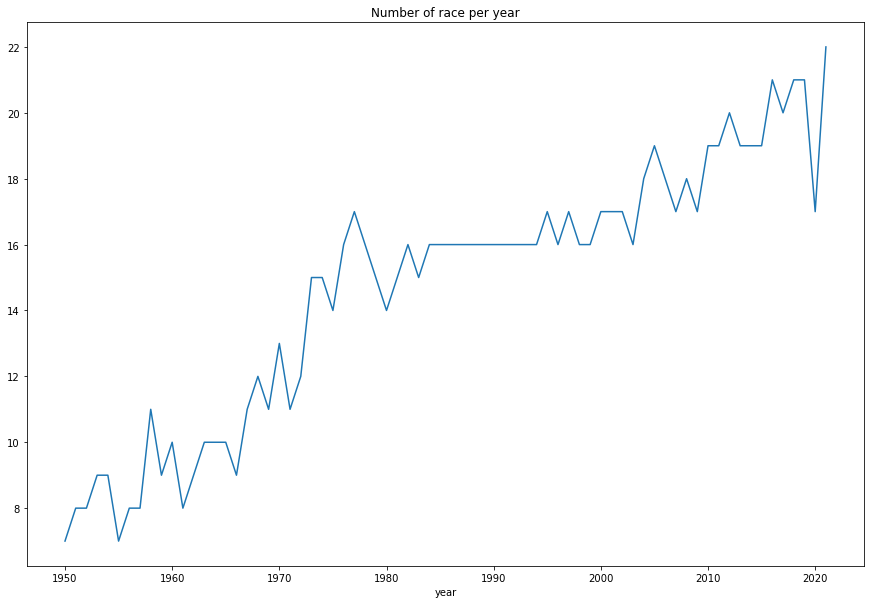

In [40]:
fig, ax = plt.subplots(figsize=(15,10))

race_info.groupby('year')['raceId'].nunique().plot(ax=ax)
plt.title('Number of race per year')


Text(0.5, 1.0, 'Number of race per country')

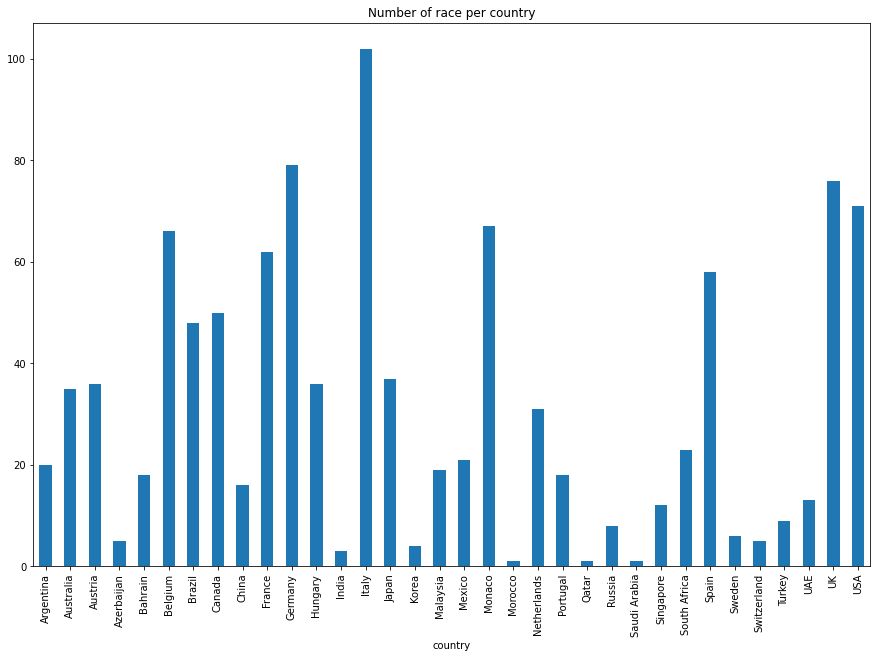

In [41]:
fig, ax = plt.subplots(figsize=(15,10))

race_info.groupby('country')['raceId'].nunique().plot(ax=ax,kind = 'bar')
plt.title('Number of race per country')


### 6.2 Plot driver age versus fastest lap (merge races_df, results_df, drivers_df)

In [42]:
df_1 = pd.merge(races_df, results_df, how='right', 
               on=['raceId']).drop(['url','points'], axis = 1)
df_2 = pd.merge(df_1, drivers_df, how='inner', 
               on=['driverId'])


In [43]:
# calculate age of drivers

from dateutil.relativedelta import *
df_2['date'] = pd.to_datetime(df_2.date)
df_2['dob'] = pd.to_datetime(df_2.dob)
df_2['driver_age'] = df_2.apply(lambda x: 
                                        relativedelta(x['date'], x['dob']).years, axis=1)
df_2.drop(['date', 'dob'], axis = 1, inplace = True)

In [65]:
df_2


,raceId,year,round,circuitId,name,time_x,resultId,driverId,constructorId,number,...,fastestLapTime,fastestLapSpeed,statusId,driverRef,forename,surname,nationality,url,driver_age,fastestLapTimeInSec
0,18,2008,1,1,Australian Grand Prix,4.5,1,1,1,22.0,...,1:27.452,218.300,1,hamilton,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,23,87.452
1,19,2008,2,2,Malaysian Grand Prix,7.0,27,1,1,22.0,...,1:35.462,209.033,1,hamilton,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,23,95.462
2,21,2008,4,4,Spanish Grand Prix,12.0,69,1,1,22.0,...,1:22.017,204.323,1,hamilton,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,23,82.017
3,22,2008,5,5,Turkish Grand Prix,12.0,90,1,1,22.0,...,1:26.529,222.085,1,hamilton,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,23,86.529
4,23,2008,6,6,Monaco Grand Prix,12.0,109,1,1,22.0,...,1:18.510,153.152,1,hamilton,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,23,78.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,1062,2021,11,11,Hungarian Grand Prix,13.0,25171,852,213,22.0,...,1:22.450,191.286,1,tsunoda,Yuki,Tsunoda,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,21,82.450
3398,1073,2021,22,24,Abu Dhabi Grand Prix,13.0,25389,852,213,22.0,...,1:27.496,217.285,1,tsunoda,Yuki,Tsunoda,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,21,87.496
3399,1057,2021,6,73,Azerbaijan Grand Prix,12.0,25078,854,210,47.0,...,1:47.624,200.799,1,mick_schumacher,Mick,Schumacher,German,http://en.wikipedia.org/wiki/Mick_Schumacher,22,107.624
3400,1065,2021,14,14,Italian Grand Prix,13.0,25240,854,210,47.0,...,1:26.707,240.520,1,mick_schumacher,Mick,Schumacher,German,http://en.wikipedia.org/wiki/Mick_Schumacher,22,86.707


In [44]:
#Caculate fastest lap time in seconds
df_2['fastestLapTimeInSec'] = pd.to_datetime(df_2['fastestLapTime'], format='%M:%S.%f').dt.minute*60 + pd.to_datetime(df_2['fastestLapTime'], format='%M:%S.%f').dt.second + pd.to_datetime(df_2['fastestLapTime'], format='%M:%S.%f').dt.microsecond/1000000


In [45]:
df_2['driver_age'].astype(float)

0       23.0
1       23.0
2       23.0
3       23.0
4       23.0
        ... 
3397    21.0
3398    21.0
3399    22.0
3400    22.0
3401    22.0
Name: driver_age, Length: 3402, dtype: float64

<AxesSubplot:title={'center':'Average fastest lap time per driver age'}, xlabel='driver_age'>

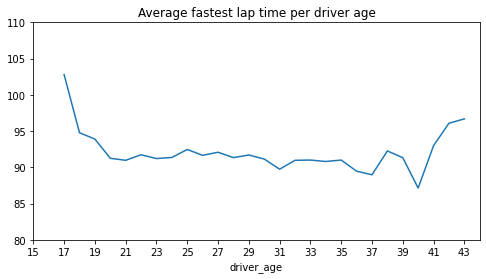

In [46]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlim([16, 44])
ax.set_ylim([80, 110])
ax.set_title("Average fastest lap time per driver age")
ax.xaxis.set_ticks(np.arange(15, 45, 2))
df_2.groupby('driver_age').fastestLapTimeInSec.mean().plot(ax=ax)


### 6.3 Plot driver age versus win counts 

In [47]:
df_3 = pd.merge(df _2, driverstandings_df, how='inner', 
               on=['driverId'])

In [48]:
df_3.head(3)

,raceId_x,year,round,circuitId,name,time_x,resultId,driverId,constructorId,number,...,nationality,url,driver_age,fastestLapTimeInSec,driverStandingsId,raceId_y,points,position_y,positionText_y,wins
0,18,2008,1,1,Australian Grand Prix,4.5,1,1,1,22.0,...,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,23,87.452,1,18,10.0,1,1,1
1,18,2008,1,1,Australian Grand Prix,4.5,1,1,1,22.0,...,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,23,87.452,9,19,14.0,1,1,1
2,18,2008,1,1,Australian Grand Prix,4.5,1,1,1,22.0,...,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,23,87.452,27,20,14.0,3,3,1


<AxesSubplot:title={'center':'Win counts per driver age'}, xlabel='driver_age'>

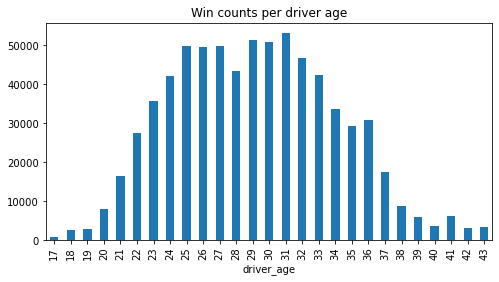

In [49]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlim([16, 44])
ax.set_title("Win counts per driver age")
ax.xaxis.set_ticks(np.arange(15, 45, 2))
df_3.groupby('driver_age').wins.count().plot(ax=ax, kind='bar')

### 6.4 Plot number of pitstops at time of the race (merge pitstops_df, races_df, circuits_df)

In [50]:
races_df = races_df.drop(['time','url'], axis=1)

In [51]:
df_4 = pd.merge(races_df, pitstops_df, how='inner', 
               on=['raceId'])


In [52]:
#since each race has different # of laps, we normalize the number of laps per race

grouper = laptimes_df.groupby('raceId')['lap']     #the laptimes_df gives how many laps are there in each race                                                                         
maxx = grouper.transform('max')                                                                                   
minn = grouper.transform('min')                                                                                    
  
result = df_4.assign(lap=(df_4.lap+1 - minn)/(maxx - minn))                                                       
result                                                                                                             


,raceId,year,round,circuitId,name,date,driverId,stop,lap,time,duration,milliseconds
0,841,2011,1,1,Australian Grand Prix,2011-03-27,153,1,0.017544,0 days 17:05:23,26.898,26898
1,841,2011,1,1,Australian Grand Prix,2011-03-27,30,1,0.017544,0 days 17:05:52,25.021,25021
2,841,2011,1,1,Australian Grand Prix,2011-03-27,17,1,0.192982,0 days 17:20:48,23.426,23426
3,841,2011,1,1,Australian Grand Prix,2011-03-27,4,1,0.210526,0 days 17:22:34,23.251,23251
4,841,2011,1,1,Australian Grand Prix,2011-03-27,13,1,0.228070,0 days 17:24:10,23.842,23842
...,...,...,...,...,...,...,...,...,...,...,...,...
8824,1073,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,840,2,0.753623,0 days 18:22:55,22.661,22661
8825,1073,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,815,3,0.768116,0 days 18:23:09,21.385,21385
8826,1073,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,854,2,0.753623,0 days 18:23:42,22.070,22070
8827,1073,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,852,2,0.768116,0 days 18:24:01,21.909,21909


In [69]:
result['time_of_race'] = pd.cut(result['lap'], bins=[0, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0, float('Inf')], labels=['0', '0.1', '0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1'])


In [87]:
result['time_of_race']=result['time_of_race'].astype('float')

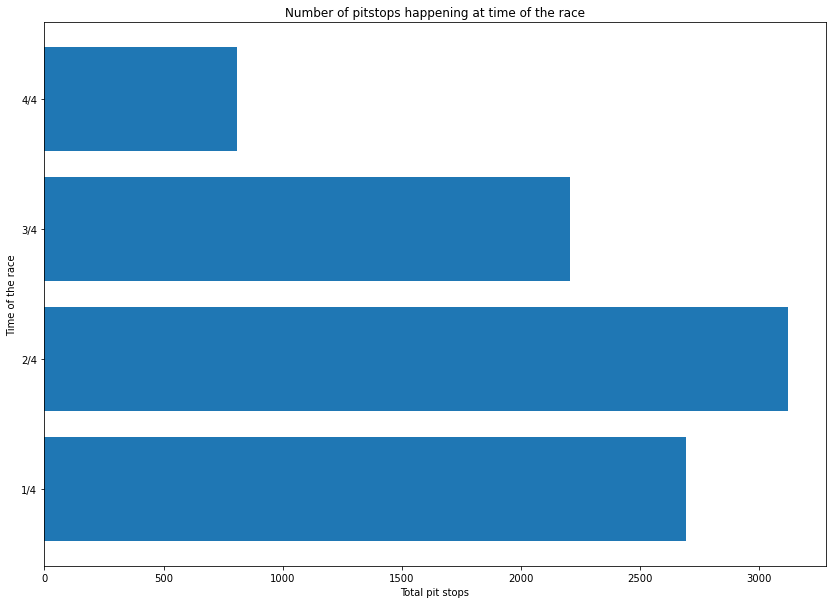

In [55]:
plt.figure(figsize=[14, 10])

plt.barh(['1/4', '2/4', '3/4','4/4'], [2693, 3121, 2206,809])

plt.xlabel('Total pit stops')
plt.ylabel('Time of the race')
# Giving the tilte for the plot
plt.title('Number of pitstops happening at time of the race')
# Saving the plot as a 'png'
plt.savefig('Number of pitstops happening at time of the race.png')
# Displaying the bar plot
plt.show()

#heatmap 

In [97]:
result['time_of_race'].value_counts()

0.2    1327
0.4    1248
0.1    1216
0.3    1193
0.5    1102
0.0     830
0.6     748
0.7     636
0.8     276
0.9     182
1.0      71
Name: time_of_race, dtype: int64

In [111]:
# selected= result['time_of_race']
dataa= result.groupby['time_of_race'].count()


#flights = flights.pivot("month", "year", "passengers")
sns.heatmap(dataa,vmin=0, vmax=1)


TypeError: 'method' object is not subscriptable

In [106]:
dataa

,time_of_race,name,Counts
0,0.0,Australian Grand Prix,830
1,0.0,Australian Grand Prix,830
2,0.1,Australian Grand Prix,1216
3,0.2,Australian Grand Prix,1327
4,0.2,Australian Grand Prix,1327
...,...,...,...
8824,0.7,Abu Dhabi Grand Prix,636
8825,0.7,Abu Dhabi Grand Prix,636
8826,0.7,Abu Dhabi Grand Prix,636
8827,0.7,Abu Dhabi Grand Prix,636


- Most pitstops happens at the 1/4 and 2/4 time of the race

### 6.5 How number of pit stops change over year 

In [56]:
result['year'].value_counts()

2011    1114
2016     989
2013     951
2012     946
2014     816
2021     798
2015     741
2017     694
2019     650
2020     594
2018     536
Name: year, dtype: int64

In [57]:
round(result['year'].value_counts()/result.groupby('year').raceId.nunique())


2011    59.0
2012    47.0
2013    50.0
2014    43.0
2015    39.0
2016    47.0
2017    35.0
2018    26.0
2019    31.0
2020    35.0
2021    38.0
dtype: float64

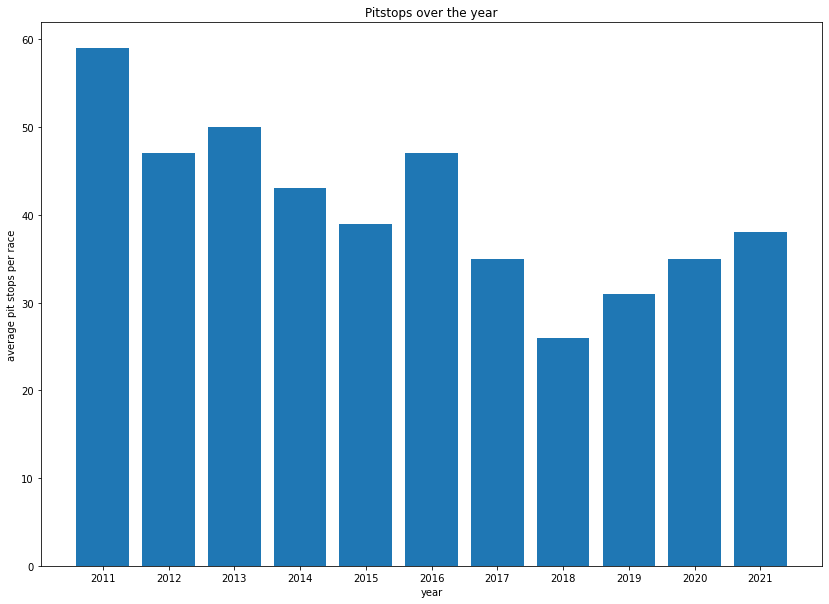

In [58]:
plt.figure(figsize=[14, 10])

plt.bar(['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'], [59.0,47.0,50.0,43.0,39.0,47.0,35.0,26.0,31.0,35.0,38.0])

plt.xlabel('year')
plt.ylabel('average pit stops per race')
plt.title('Pitstops over the year')

plt.show()

Number of pit stops per race experienced a downward tren until 2018, then increased again

### 6.6 Explore pit stops per circuits 

In [59]:
result

,raceId,year,round,circuitId,name,date,driverId,stop,lap,time,duration,milliseconds,time_of_race
0,841,2011,1,1,Australian Grand Prix,2011-03-27,153,1,0.017544,0 days 17:05:23,26.898,26898,1/4
1,841,2011,1,1,Australian Grand Prix,2011-03-27,30,1,0.017544,0 days 17:05:52,25.021,25021,1/4
2,841,2011,1,1,Australian Grand Prix,2011-03-27,17,1,0.192982,0 days 17:20:48,23.426,23426,1/4
3,841,2011,1,1,Australian Grand Prix,2011-03-27,4,1,0.210526,0 days 17:22:34,23.251,23251,1/4
4,841,2011,1,1,Australian Grand Prix,2011-03-27,13,1,0.228070,0 days 17:24:10,23.842,23842,1/4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8824,1073,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,840,2,0.753623,0 days 18:22:55,22.661,22661,4/4
8825,1073,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,815,3,0.768116,0 days 18:23:09,21.385,21385,4/4
8826,1073,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,854,2,0.753623,0 days 18:23:42,22.070,22070,4/4
8827,1073,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,852,2,0.768116,0 days 18:24:01,21.909,21909,4/4


In [60]:
result.dtypes

raceId                    int64
year                      int64
round                     int64
circuitId                 int64
name                     object
date                     object
driverId                  int64
stop                      int64
lap                     float64
time            timedelta64[ns]
duration                 object
milliseconds              int64
time_of_race           category
dtype: object

<AxesSubplot:title={'center':'Pit stop counts per circuit'}>

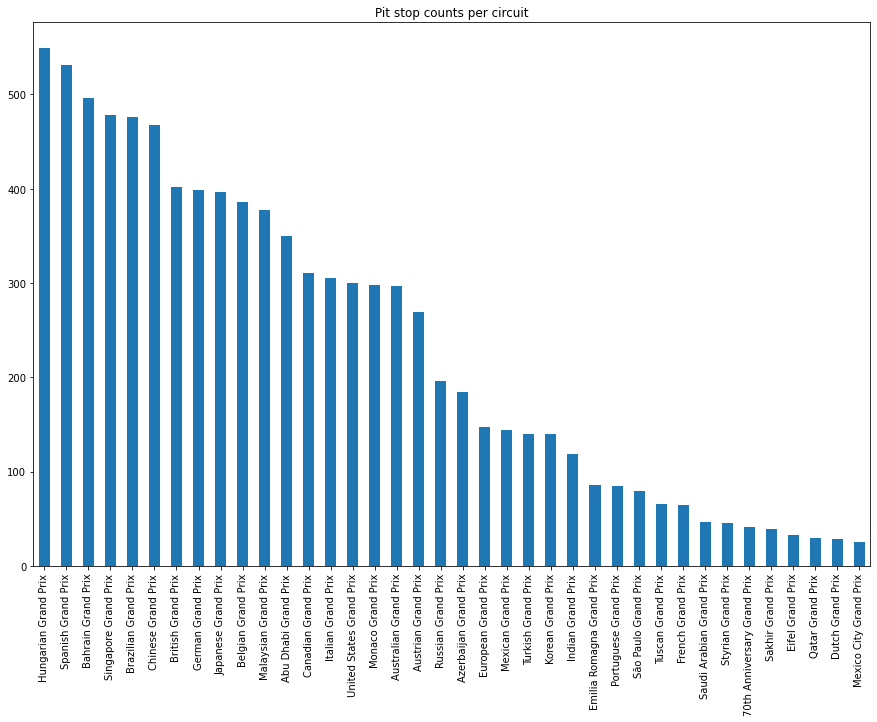

In [61]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title("Pit stop counts per circuit")
result['name'].value_counts().plot(ax=ax, kind='bar',legend = False)



 Circuits with most pitstops happening is 
- Hungarian Grand Prix           549
- Spanish Grand Prix             531
- Bahrain Grand Prix             496
- Singapore Grand Prix           478
- Brazilian Grand Prix           476
- Chinese Grand Prix             468

Text(0.5, 1.0, 'Distribution of pitstops of most important circuits')

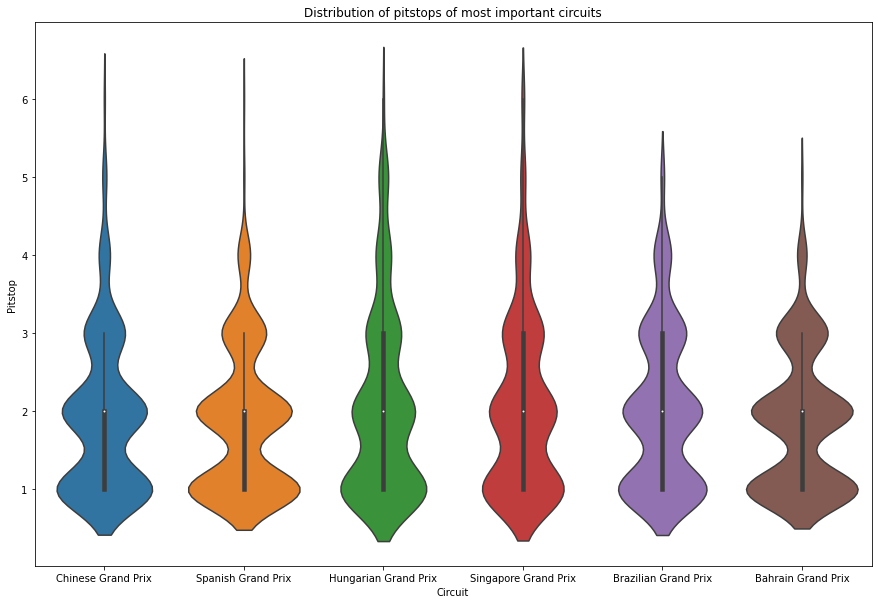

In [62]:
#select the most relevant circuits

selected_cir = result[(result['name'].isin(['Hungarian Grand Prix','Spanish Grand Prix',
                                         'Bahrain Grand Prix','Singapore Grand Prix',
                                         'Brazilian Grand Prix','Chinese Grand Prix']))]

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.violinplot(x="name", y="stop", data=selected_cir)
plt.xlabel('Circuit')
plt.ylabel('Pitstop')
plt.title('Distribution of pitstops of most important circuits')


### 6.7 Explore relatioship between starting and finishing position

Variables:
grid: The starting position before the race.
positionOrder: the finishing position

In [63]:
df1 = pd.merge(results_df,races_df[['raceId','year', 'name','round']],on='raceId', how='left').drop(['year','name'],axis=1)
df2 = pd.merge(df1,drivers_df[['driverId','driverRef', 'nationality']],on='driverId', how='left').drop(['nationality'],axis=1)
df3 = pd.merge(df2,constructors_df[['constructorId', 'name','nationality']],on='constructorId', how='left')

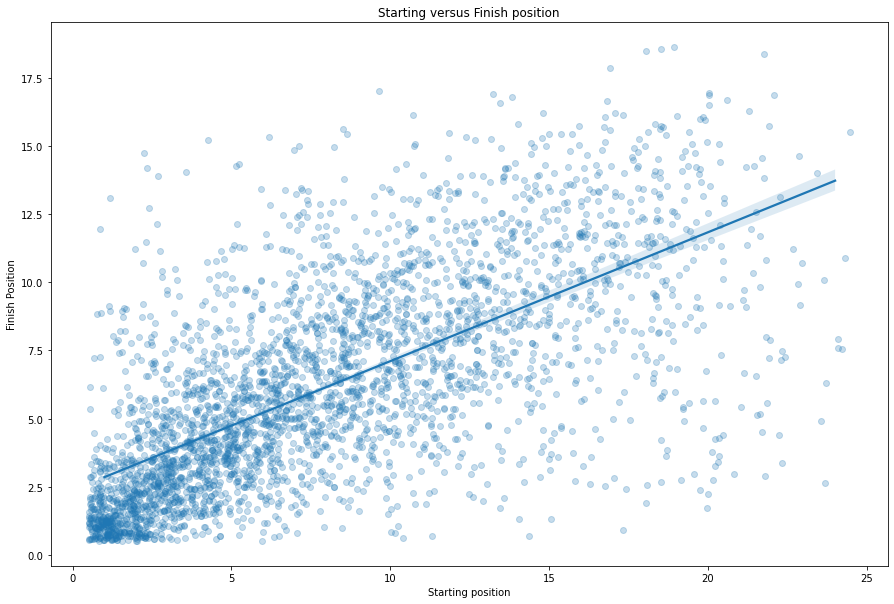

In [64]:
# Exclude data points where grid = 0
df_excl = df3[df3['grid'] != 0]

# create a plot
plt.figure(figsize = [15, 10])
sns.regplot(data = df_excl, x = 'grid', y = 'positionOrder', x_jitter = 0.5, y_jitter = 0.5, scatter_kws = {'alpha' : 1/4});
plt.title('Starting versus Finish position')
plt.ylabel('Finish Position')
plt.xlabel('Starting position');

We can see that there is a linear relationship between starting and finishing position 